# E-commerce — Analysis of product assortment.

**Project Description for the Research of the Online Store "Still Here" for Home Goods**

**Research Objective:** Analyze the product assortment, distinguish between primary and secondary assortments.

**Client:** Research commissioned by the manager responsible for the relevance of the product assortment.

**Key Steps Taken in the Work:**

**Step 1: Data Preprocessing**

- Standardizing all data formats
- Identifying missing values
- Identifying duplicates
- Identifying implicit duplicates (where one order number corresponds to one customer)
- Identifying anomalies (e.g., wholesale purchases)
- Cleaning the data from outliers and duplicates

**Step 2: Categorization of Assortment**

Grouping products into categories based on their characteristics and purpose.

**Step 3: Analysis of Demand over Time (Seasonality)**

- Examining how demand changes by category monthly, daily, and hourly.
- Visualizing the results of the research.

**Step 4: ABC Analysis**

- Categorizing products into 5-7 groups.
- Grouping categories into ABC groups based on revenue.
- Grouping categories into XYZ groups based on demand.
- Creating a matrix of category intersections.
- Visualizing the results of the research.

**Step 5: Hypothesis Formulation and Testing**

- Testing the equality of average receipts for the "flowers" category and the "herbs, vegetables, fruits" category.
- Testing the equality of the average quantities sold for different years but similar months.

**Step 6: Conclusions**

Summarizing the findings and insights gained from the project. This should include key observations, trends, and actionable recommendations for optimizing the product assortment in "Still Here" home goods online store.

## Step 1: Data Preprocessing

In [67]:
# Import all necessary libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as datetime
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
from plotly import graph_objects as go


In [68]:
# Reading the file
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
data = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )
display(data.head())

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


###  Identifying missing values

No missing values are observed in the data.

In [70]:
# Changing the date format
data['date'] = pd.to_datetime(data['date'], format= '%Y%m%d%H')
display(data.tail())

,date,customer_id,order_id,product,quantity,price
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0
7473,2020-01-31 15:00:00,2e460a26-35af-453d-a369-a036e95a40e0,103225,Вешалка для блузок 41 см красный Attribute AHM781,1,104.0


#### duplicates

In [71]:
# Identifying explicit duplicates
duplicats = data.duplicated().count() - data.count()
print(duplicats)

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64


No explicit duplicates are found.

Identifying implicit duplicates

Checking for duplicates in the data after removing the date column.
Removing all identified duplicate rows.

In [72]:
data[['customer_id', 'order_id','product','quantity','price']].duplicated().sum()

1864

In [73]:
data_dupl = data[['customer_id', 'order_id','product','quantity','price']].drop_duplicates()

In [74]:
data_dupl[['customer_id', 'order_id','product','quantity','price']].duplicated().sum()

0

In [75]:
data_date = data[['date']]

In [76]:
data_flt = pd.merge(data_date, data_dupl, left_index=True, right_index=True)

One customer can place multiple different orders, but one order can correspond to only one customer.

Filtering out all erroneous rows using the function below.

In [77]:
def construct_df(filtered_rows):


    order2customer = {}
    filtered_rows = []

    for _, row in data_flt.iterrows(): # Creating a loop to iterate through all rows of the dataframe
        order_id = row['order_id']
        customer_id = row['customer_id']
        if order_id not in order2customer: 
            # If the order is not in order2customer, assign the value of customer_id to order2customer
            order2customer[order_id] = customer_id
            # the value of the row is written to filtered_rows
            filtered_rows.append(row)
        else:
            # If the customer_id is already present in the order2customer list, but it corresponds to the same order_id
            # as the row that already exists in the filtered dataframe, then this row is also added to the new dataframe.
            prev_customer_id = order2customer[order_id]
            if prev_customer_id == customer_id:
                filtered_rows.append(row)
    return pd.DataFrame(filtered_rows)

data_flt = construct_df(data_flt)

In [78]:
data_flt.reset_index() 

,index,date,customer_id,order_id,product,quantity,price
0,0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...,...
5570,7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
5571,7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
5572,7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
5573,7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


In [79]:
lost_rows = 1-(data_flt.shape[0])/data.shape[0]
print('Percentage of lost values lost_rows {:2.2%}'.format(lost_rows))


Percentage of lost values lost_rows 25.41%


Data exploration of product quantity and cost with the aim of visualizing outliers.

<Figure size 720x288 with 0 Axes>

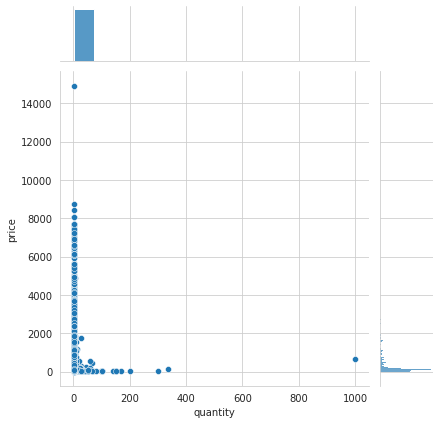

In [80]:
plt.figure(figsize=(10, 4))

sns.jointplot(data=data_flt, x='quantity', y='price')


Analysis of products that sell in large volumes.

In [81]:
data_flt.sort_values(by= 'quantity', ascending = False).head(50)

,date,customer_id,order_id,product,quantity,price
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
568,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
211,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
2431,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0
212,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"Щетка для посуды *ОЛЯ*, Мультипласт 1807010",100,26.0


Decorative items and tableware are often purchased,in large volumes, which is logical!

Removing rows where the quantity of purchases is more than 50 units is aimed at excluding wholesale transactions, as they are not of interest.

There are no significant outliers observed in the product price range.

In [82]:
data_flt = data_flt.query('quantity<=50')

<Figure size 720x288 with 0 Axes>

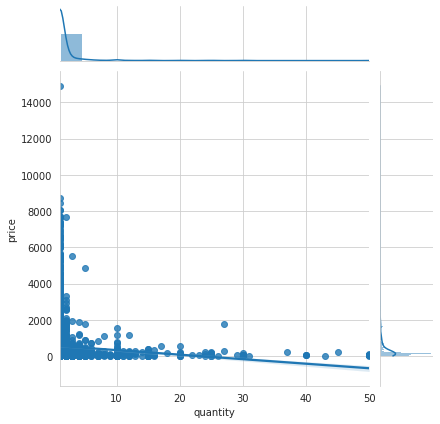

In [83]:
plt.figure(figsize=(10, 4))

sns.jointplot(data=data_flt, x='quantity', y='price', kind='reg')


In [84]:
lost_rows = 1-(data_flt.shape[0])/data.shape[0]
print('The percentage of lost values`: {:2.2%}'.format(lost_rows))

print('Correlation: ', data_flt['quantity'].corr(data_flt['price']))

The percentage of lost values`: 25.72%
Correlation:  -0.09704956598589803


The correlation between the quantity of sold products and the price is not significant but negative. In general, the more expensive the product, the fewer purchases it attracts, which is logical.

### Adding the necessary columns.

For further analysis, we need to create columns for revenue, day of the week, and month.

In [85]:
data_flt['revenue'] = data_flt['price']*data_flt['quantity']
data_flt['month'] = data_flt['date'].dt.to_period("M")
data_flt['day'] = data_flt['date'].dt.weekday
data_flt['hour'] = data_flt['date'].dt.hour

#display(data_flt.head(30))

In [86]:
data_flt['product'] = data_flt['product'].str.lower() # Converting product names to lowercase.

## Step 2: Assortment Categorization

### Data preprocessing before categorization

Preprocessing the 'Products' column:
- Retaining only Russian letters, hyphens, and spaces.
- Removing words longer than 3 letters.
- Retaining only the first 2 words.

In [87]:
def transform(s):
    ru_s = ''
    for c in s:
        if c == '-' or c.isspace() or (ord('а') <= ord(c) <= ord('я')): 
            # Selecting only words with Russian letters, spaces, and hyphens
            ru_s = ru_s + c

    words = []
    for word in ru_s.split():
        if len(word) > 3:  # Choosing only words with a length greater than 3 letters
            words.append(word)

    res = ''
    for word in words[:2]:  # Selecting only the first 2 words
        res = res + ' ' + word

    return res.strip()


In [88]:
data_flt['product'] = data_flt['product'].apply(transform)
display(data_flt.info());

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5552 entries, 0 to 7473
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5552 non-null   datetime64[ns]
 1   customer_id  5552 non-null   object        
 2   order_id     5552 non-null   int64         
 3   product      5552 non-null   object        
 4   quantity     5552 non-null   int64         
 5   price        5552 non-null   float64       
 6   revenue      5552 non-null   float64       
 7   month        5552 non-null   period[M]     
 8   day          5552 non-null   int64         
 9   hour         5552 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2), period[M](1)
memory usage: 477.1+ KB


None

In [89]:
items_num = data_flt['product'].nunique()
print('The number of unique products. = ', items_num)
print()
print('Product names and their frequency of occurrence')
display(data_flt['product'].value_counts().head())


The number of unique products. =  981

Product names and their frequency of occurrence


пеларгония зональная     389
сушилка белья            298
пеларгония розебудная    255
рассада зелени           236
томата помидор           168
Name: product, dtype: int64

From this dictionary, we will create 6 categories:
 - Herbs, vegetables, fruits
 - Flowers
 - Kitchen
 - Clothing care, cleaning
 - Decor, body care
 - Bulky goods, repairs
 - Other
 

In [90]:
# Function determines the key as the product category if its name contains at least
# partially matches a word from the corresponding value.
def categorize(e):
    word_to_cat = {
    'herbs, vegetables, fruits' : ['салат', 'рассада', 'томат', 'помидор', 'мята',  'бальзамин', 'эвкалипт', \
                             'базилик', 'мелисса', 'цикламен' , 'дыня', \
                             'капуста',  'арбуз',  'баклажан', 'валериана', \
                             'баклажан','тимьян', 'огурец', 'зверобой', 'земляника', 'укроп', \
                             'петрушка', 'клубника', 'чабер', 'ромашка', 'ясколка', 'дендробиум', \
                             'капроновый', 'розмарин', 'сельдерей', 'табак', 'патиссон', 'тыква', 'кабачок'],
    'flowers' : ['ампельная','пеларгония', 'герань', 'флокс', 'петуния', 'растение', 'горшке', 'калибрахоа', 'примула',\
               'циперус', 'антуриум', 'артемизия', 'хлорофитум', 'цинния', 'маттиола', 'хризантема', 'овсянница', 'вигна',\
               'сантолина', 'капсикум', 'колокольчик', 'котовник', 'гардения', 'диффенбахия', 'вербейник', 'тагетис', \
               'вербейник', 'пуансеттия', 'настурция','глоксиния', 'космея', 'фаленопсис', 'эхеверия','аптения', 'алоэ',\
               'гвоздика', 'цветущее','мединилла', 'незабудка', 'вербена', 'мирт', 'калатея', 'лобелия', 'мимоза', 'фиалка',\
               'алиссум', 'папоротник', 'лапчатка', 'кореопсис', 'эхинокактус', 'гипсофила', 'клен', 'цитрофортунелла', 'хоста'\
               'каланхое', 'физостегия', 'ранункулус', 'седум', 'камнеломка', 'калла', 'барвинок', 'каланхое', 'энотера', \
               'спатифиллум', 'аспарагус', 'змееголовник', 'аквилегия','лаванда', 'фуксия', 'бегония', 'роза', 'афеляндра',\
               'азалия','хризантема' ,'фиалка'],
    'kitchen': ['кондитерский', 'пищевой', 'тарелка', 'чайник', 'сковорода', 'банка', 'вилка','скатерть','кухонн', 'пластмассов',\
             'весы', 'чай', 'мокружка', 'овощеварка', 'термос', 'лопатка', 'разделочная', 'фужеров',\
             'перчатки', 'салфетки', 'контейнер', 'терка', 'кружка', 'столов', 'кофе', 'мук', 'хлебница', 'выпечки', 'нож',\
             'миска', 'миксер', 'крышка', 'блюдце', 'повар', 'блюдо', 'бокалов', 'овощей', 'емкость',\
              'сумка хозяйственная', 'кастрюля', 'кувшин', 'кисточка', 'вакуумный', 'сотейник', 'сито'\
              'мясорубки', 'скалка', 'рыбочистка', 'стакан', 'толкушка', 'соковыжималка', 'лопатка'],
    'lothing care, cleaning' : ['белья', 'глади', 'чехол', 'вешал', 'стираль', 'плечики', 'вешалка', 'корыто', 'окно',\
                               'подрукавник', 'кофр', 'сушилк','швабра', 'щетка', 'веник', 'утюг','средство', 'тряпк','хранен',
                               'насадка', 'вантуз', 'прищепки', 'комплект','мусора', 'лоток', 'совок'],
    'bulky goods, repair' : [ 'тележк', 'корзина', 'карниз', 'шнур', 'штанга', 'стремянк','ванну', 'строительн',\
                                 'полки','комод', 'подставка', 'ящик', 'урна', 'линейка', 'уличный'\
                                 'ведр','этажерка', 'унитаз', 'стяжк', 'крючок', 'картонная', 'петля-стрела','хозяйст'\
                                 'сварка', 'матрас', 'бензин', 'сварка', 'стеллаж', 'полка', 'короб'],    
    'decor, body care' : [ 'штор','искусствен', 'кашпо', 'муляж', 'ковр', 'ковер', 'новогоднее', 'салфетка', 'покрывало',\
                            'декоратив', 'подарочный', 'простын', 'наволочка', 'фоторамка', 'одеяло', 'махровое','зубная', 
                              'махровых', 'плед', 'ванн', 'мыл', 'маска']
    }  
  
    for category, words in word_to_cat.items():
         for word in words:
            if word in e:
                return category  
    return 'other'      

In [91]:
data_flt['category'] = data_flt['product'].apply(categorize)
#data_flt.head()

After categorization, most products were assigned to their respective categories. Only those products that occur three times or fewer were placed in the 'Other' category. The majority of items are mentioned only once or twice. The 'Other' category is the least populated and diverse, and we will not analyze it.

In [92]:
data_flt['category'].value_counts()

flowers                      1651
herbs, vegetables, fruits    1027
lothing care, cleaning        853
decor, body care              641
bulky goods, repair           595
kitchen                       528
other                         257
Name: category, dtype: int64

## Step 3: Analysis of demand over time (seasonality)

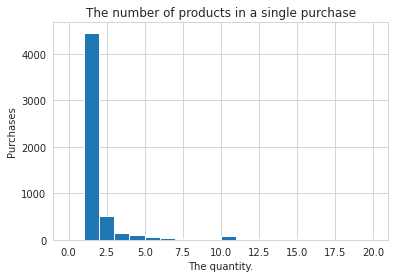

In [93]:

data_flt.hist('quantity', range=(0,20), bins =20)

plt.title('The number of products in a single purchase')
plt.xlabel('The quantity.')
plt.ylabel('Purchases');


The histogram shows that the majority of customers purchase a single item, which is quite logical!

<Figure size 720x288 with 0 Axes>

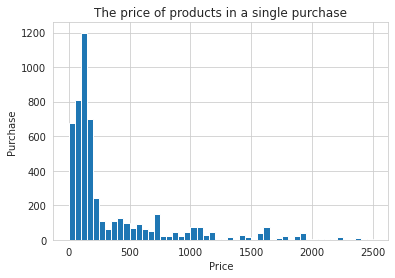

In [94]:
plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

data_flt.hist('price', range=(0,2500), bins =50)
plt.title('The price of products in a single purchase')
plt.xlabel('Price')
plt.ylabel('Purchase');


The price distribution histogram indicates a pattern closely resembling a Poisson distribution, with a significant number of products priced around 200 rubles.

In [95]:
fig = go.Figure(data=[go.Pie(labels = data_flt['category'],
                             values = data_flt['revenue'])]) #Specifying the values that will appear on the segment labels
fig.update_layout(title= 'The proportions of different categories in revenue',
                  width=800, 
                  height=500,
                  annotations=[dict(x=1.12, # manually adjusting the legend annotation.
                                    y=1.05,
                                    text='Category',
                                    showarrow=False)])
fig.show() 

The highest revenue comes from the categories 'Bulky goods, repairs' and 'Clothing care and cleaning.' 

The least populated category is 'Herbs, vegetables, fruits.

In [96]:
fig = go.Figure(data=[go.Pie(labels = data_flt['category'],
                             values = data_flt['quantity'])]) #Specifying the values that will appear on the segment labels
fig.update_layout(title= 'The proportions of different categories in the overall product volume',
                  width=800, 
                  height=500,
                  annotations=[dict(x=1.12, # manually adjusting the legend annotation.
                                    y=1.05,
                                    text='Category',
                                    showarrow=False)])
fig.show() 

However, the categories with the most items are 'Flowers' and 'Herbs, vegetables, fruits.' The least populated category is 'Bulky goods, repairs.'

### Analysis of revenue by hours

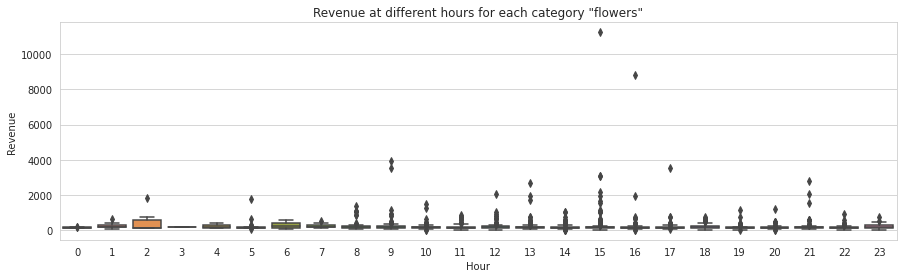

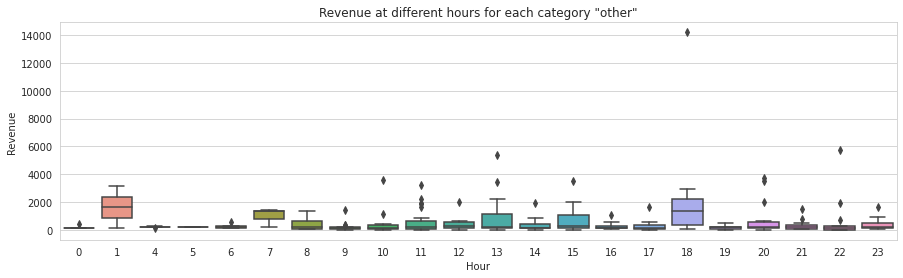

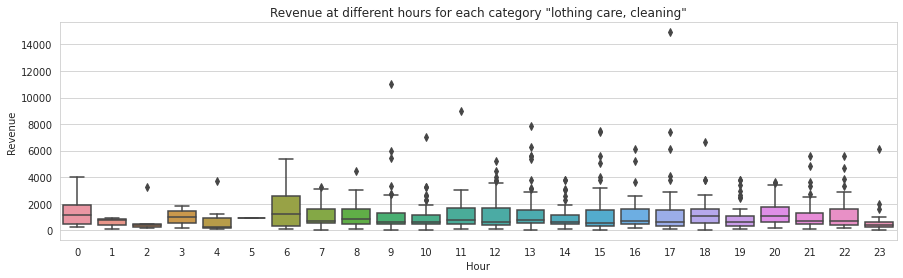

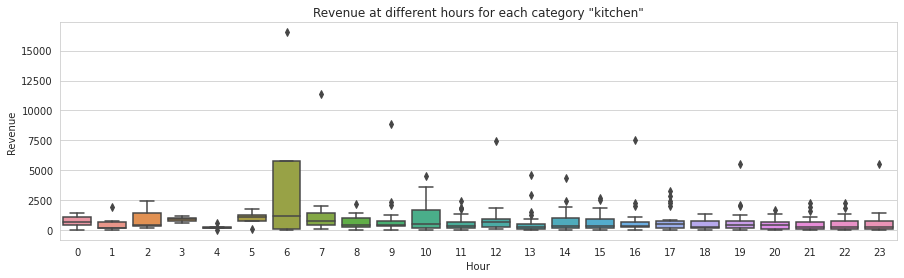

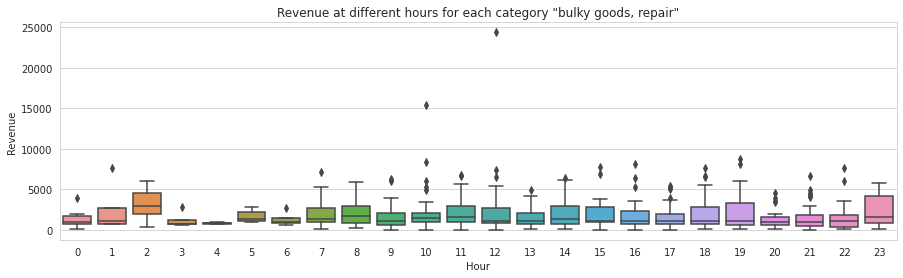

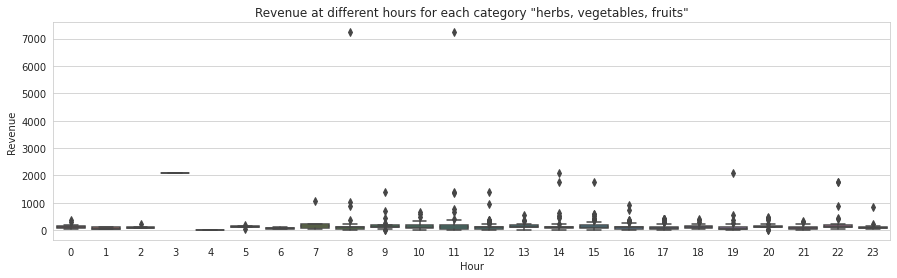

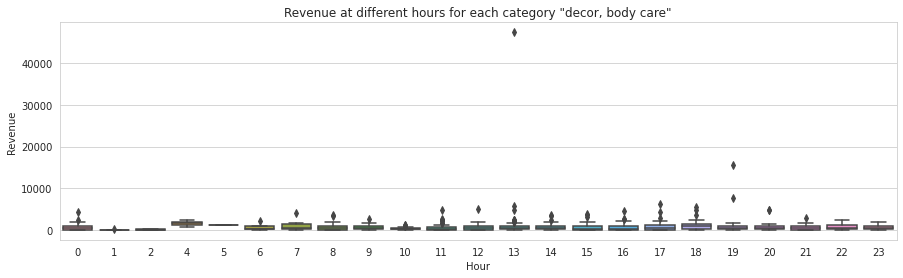

In [97]:
sns.set_style('whitegrid')

categories =  data_flt['category'].unique()
for cat in categories:
     df_cat = data_flt[data_flt['category'] == cat]
     plt.figure(figsize=(15, 4))

     sns.boxplot(data = df_cat, x='hour', y='revenue')  # Building a graph based on the obtained table

     plt.xlabel('Hour')    
     plt.ylabel('Revenue')
     plt.title('Revenue at different hours for each category "{}"'.format(cat))
     plt.show()

Analysis of revenue from different categories by hours did not reveal any significant patterns. One might expect that demand at night would be much lower than during the day, and peak in the evening, but this is not observed. There are some sporadic spikes, but they do not follow a logical pattern.

It is possible that this store operates nationwide, and orders are placed from different time zones, which could explain the blurred pattern. I would also request data on the geography of customers.

###  Analysis of revenue by days of the week.

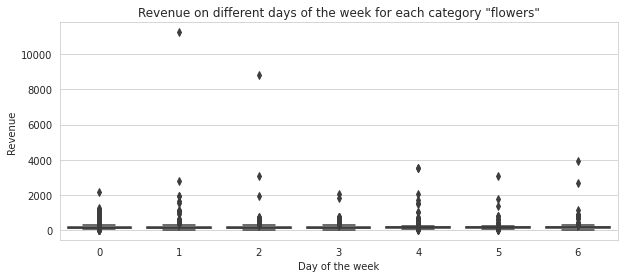

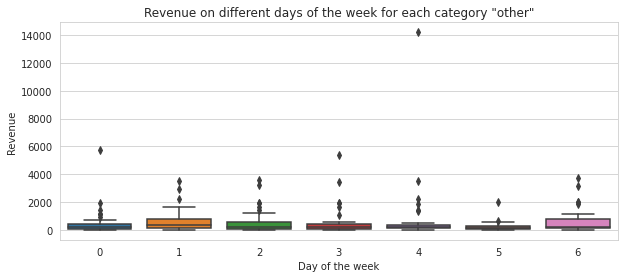

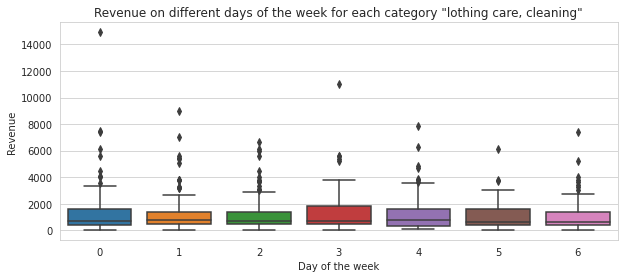

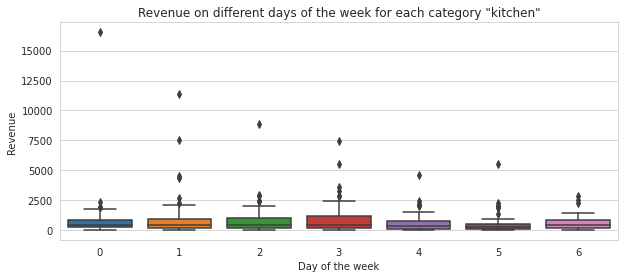

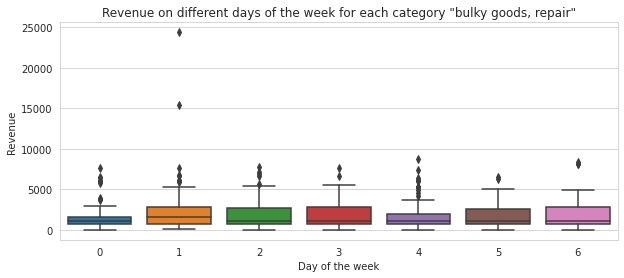

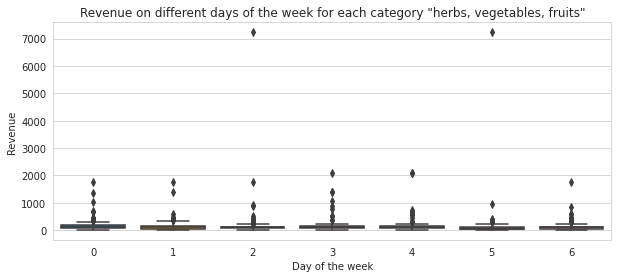

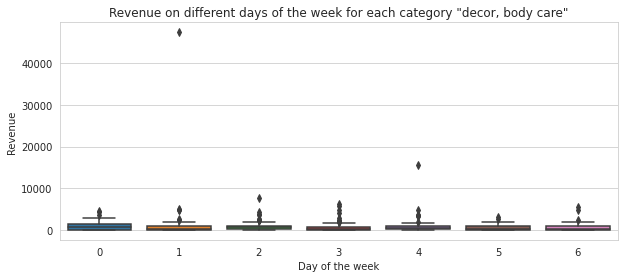

In [98]:
sns.set_style('whitegrid')
categories =  data_flt['category'].unique()
for cat in categories:
     df_cat = data_flt[data_flt['category'] == cat]
     plt.figure(figsize=(10, 4))

     sns.boxplot(data =df_cat, x='day', y='revenue')  # Building a graph based on the obtained table

     plt.xlabel('Day of the week')    
     plt.ylabel('Revenue')
     plt.title('Revenue on different days of the week for each category "{}"'.format(cat))
     plt.show()

From the boxplot, it is evident that the 'Flowers' and 'Herbs, vegetables, fruits' categories generate relatively low revenue, so we'll shift our focus to other categories.

- In the 'Bulky goods, repairs' category, demand remains steady throughout the week, with a slight dip on Monday and Friday.
- For the 'Decor, body care' category, the highest demand is observed on Monday, while the largest median value occurs on Wednesday.
- In the 'Clothing care, cleaning' category, the median revenue values are approximately consistent throughout the week.

Overall, there doesn't seem to be a significant impact of the day of the week on demand.

### Analysis of revenue by months.

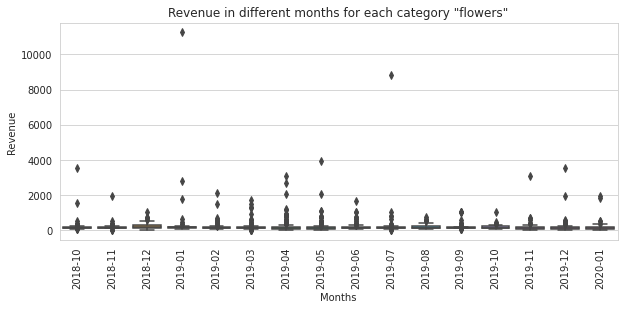

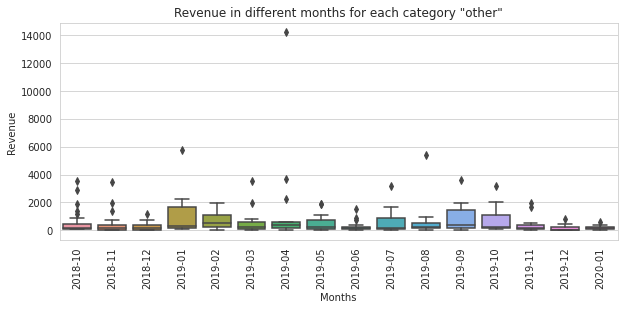

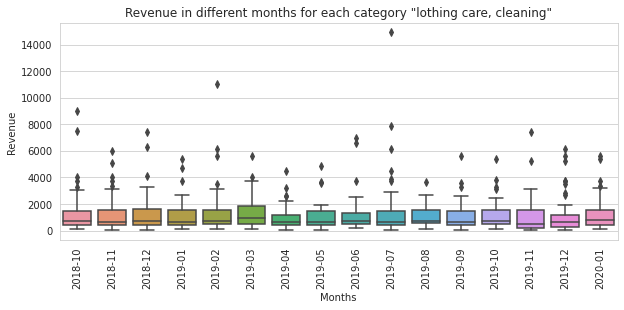

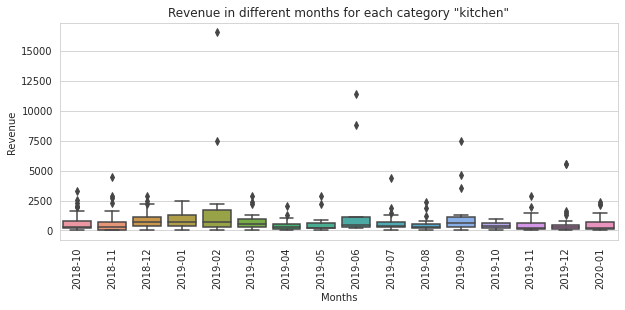

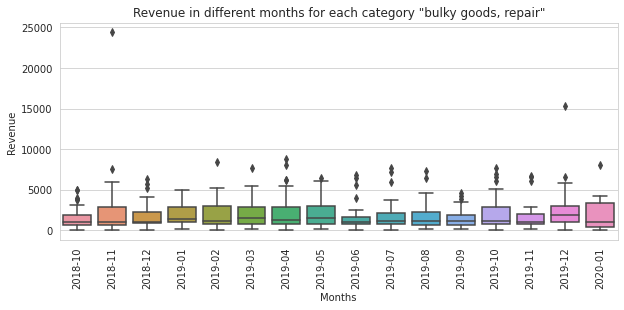

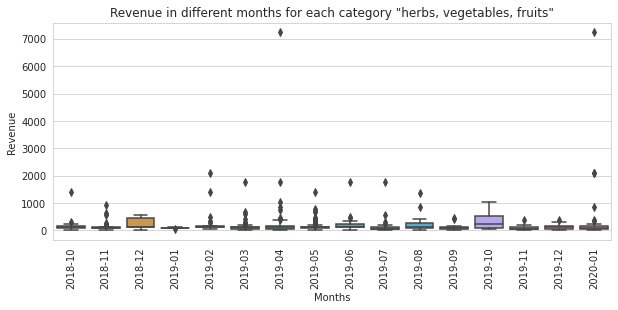

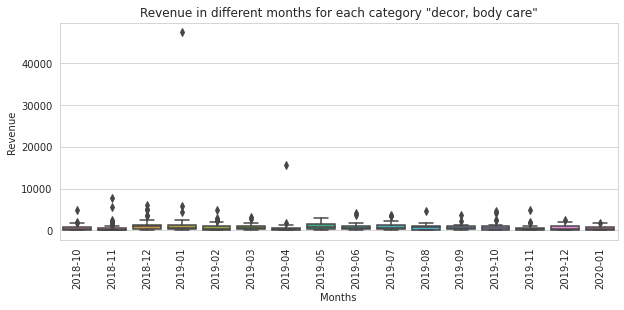

In [99]:
sns.set_style('whitegrid')
categories =  data_flt['category'].unique()
for cat in categories:
     df_cat = data_flt[data_flt['category'] == cat]
     plt.figure(figsize=(10, 4))

     sns.boxplot(data =df_cat, x='month', y='revenue')  # Building a graph based on the obtained table
     plt.xticks(rotation=90)
     plt.xlabel('Months')    
     plt.ylabel('Revenue')
     plt.title('Revenue in different months for each category "{}"'.format(cat))
     plt.show()

## Step 4: ABC categorization function.

In [100]:
# A function for classifying products into ABC groups
def ABC_group(share):    
    if share <= 80:
        return 'A'
    if share <= 95:
        return 'B'
    return 'C' 

In [101]:
# Grouping and sorting products by total revenue.
ABC = data_flt.groupby('product').agg({'category':'min','revenue':'sum'}) \
                .sort_values(by='revenue', ascending=False).reset_index() 

# Calculating the revenue share and cumulative revenue percentage.
ABC['share_of_revenue'] = ((ABC['revenue']/ABC['revenue'].sum())*100).round(2)
ABC['revenut_cumsum'] = ABC['share_of_revenue'].cumsum(axis =0)

# Grouping products into ABC categories.
ABC['ABC']= ABC['revenut_cumsum'].apply(ABC_group)
display(ABC.head())


,product,category,revenue,share_of_revenue,revenut_cumsum,ABC
0,сумка-тележка хозяйственная,"bulky goods, repair",499758.5,13.36,13.36,A
1,сушилка белья,"lothing care, cleaning",315687.0,8.44,21.80,A
2,гладильная доска,"lothing care, cleaning",274344.5,7.33,29.13,A
3,сумка-тележка колесная,"bulky goods, repair",184334.5,4.93,34.06,A
4,штора ванной,"decor, body care",92052.0,2.46,36.52,A


Similar XYZ analysis for demand as for revenue. We'll name it XYZ to avoid confusion with the metrics.

In [102]:
# A function for classifying products into XYZ groups.
def XYZ_group(share):    
    if share <= 80:
        return 'X'
    if share <= 95:
        return 'Y'
    return 'Z' 

In [103]:
# Grouping and sorting products by total revenue.
XYZ = data_flt.groupby('product').agg({'category':'min','quantity':'sum'}) \
                .sort_values(by='quantity', ascending=False).reset_index() 

# Calculating the revenue share and cumulative revenue percentage.
XYZ['share_of_quantity'] = ((XYZ['quantity']/XYZ['quantity'].sum())*100).round(2)
XYZ['quantity_cumsum'] = XYZ['share_of_quantity'].cumsum(axis =0)

# Grouping products into ABC categories.
XYZ['XYZ']= XYZ['quantity_cumsum'].apply(XYZ_group)
display(XYZ.head())


,product,category,quantity,share_of_quantity,quantity_cumsum,XYZ
0,пеларгония зональная,flowers,505,4.69,4.69,X
1,искусственный цветок,"decor, body care",347,3.22,7.91,X
2,сушилка белья,"lothing care, cleaning",329,3.06,10.97,X
3,цветок искусственный,"decor, body care",324,3.01,13.98,X
4,пеларгония розебудная,flowers,316,2.94,16.92,X


In [104]:
# Merging tables based on product and category, resulting in the final table.
ABC_XYZ = pd.merge(ABC, XYZ, on = ['product','category'])
display(ABC_XYZ.head())                    

,product,category,revenue,share_of_revenue,revenut_cumsum,ABC,quantity,share_of_quantity,quantity_cumsum,XYZ
0,сумка-тележка хозяйственная,"bulky goods, repair",499758.5,13.36,13.36,A,137,1.27,30.16,X
1,сушилка белья,"lothing care, cleaning",315687.0,8.44,21.80,A,329,3.06,10.97,X
2,гладильная доска,"lothing care, cleaning",274344.5,7.33,29.13,A,155,1.44,27.56,X
3,сумка-тележка колесная,"bulky goods, repair",184334.5,4.93,34.06,A,114,1.06,35.83,X
4,штора ванной,"decor, body care",92052.0,2.46,36.52,A,89,0.83,44.65,X


### Categories of different groups of product assortment.

In [105]:
# Creating a function for categorization into assortment groups.
def ABC_XYZ_group(row):
    abc = row['ABC']
    xyz = row['XYZ']


    if abc == 'А' or abc == 'B':
        if xyz == 'Y':    
            return 'AY_BY'
    if abc == 'А' or abc == 'B':
        if xyz == 'Z':    
            return 'AZ_BZ'
    if abc == 'C': 
        if xyz == 'X':    
            return 'CX'
    if abc == 'C':
        if xyz == 'Y':    
            return 'CY'
    if abc == 'C':
        if xyz == 'Z':    
            return 'CZ'
    return 'AX_BX'


In [106]:
ABC_XYZ['ABC_XYZ']= ABC_XYZ.apply(ABC_XYZ_group, axis =1)
display(ABC_XYZ.head())

,product,category,revenue,share_of_revenue,revenut_cumsum,ABC,quantity,share_of_quantity,quantity_cumsum,XYZ,ABC_XYZ
0,сумка-тележка хозяйственная,"bulky goods, repair",499758.5,13.36,13.36,A,137,1.27,30.16,X,AX_BX
1,сушилка белья,"lothing care, cleaning",315687.0,8.44,21.80,A,329,3.06,10.97,X,AX_BX
2,гладильная доска,"lothing care, cleaning",274344.5,7.33,29.13,A,155,1.44,27.56,X,AX_BX
3,сумка-тележка колесная,"bulky goods, repair",184334.5,4.93,34.06,A,114,1.06,35.83,X,AX_BX
4,штора ванной,"decor, body care",92052.0,2.46,36.52,A,89,0.83,44.65,X,AX_BX


**MAIN assortment of the store:**

Products in the AX and BX groups. They provide the main revenue and consistently sell well.

**Recommendation:**

They should always be in stock. The required stock can be easily forecasted as sales volumes almost remain constant from month to month.

**Groups AY and BY are also high revenue, but sales stability is lower.**

**Recommendation:**
For these products, it is advisable to create additional reserves in stock to cater to potential spikes in demand during certain periods. Reserves are necessary as these groups are important contributors to the company's revenue.

**Groups AZ and BZ also generate significant revenue, but demand for them is almost impossible to predict.**
If stocking up in the warehouse based on the maximum monthly revenue is considered, a considerable portion of the product might remain unsold.

**Recommendation:**

It's better to explore alternative methods to ensure the required quantity of these products. For instance, entering into agreements with suppliers located as close as possible to the store, who can deliver the necessary batch at any moment.

**Group CX sells consistently but in small volumes.**

**Recommendation:**

For this item, it is advisable to maintain a steady stock based on the average sales volume.

**Group CY has small sales volumes and low stability.**

**Recommendation:**

Stocks for this group should be created on a residual basis, i.e., after funds are allocated for purchasing items from more profitable groups. Even if, at some point, the products from this group are not available in stock, the company's losses would be minimal.

**Group CZ has the lowest revenue volumes, and demand is unpredictable.**
These are items that have ceased to be in demand.


**Recommendation:**

It might be worth considering closing all positions in this group. Typically, stocks for this category are not maintained; they work on a made-to-order basis. However, new products could also fall into this group. They may not have demand yet because customers are not aware of them. These items have not yet been delivered to stores, displayed on shelves, or launched in marketing campaigns.

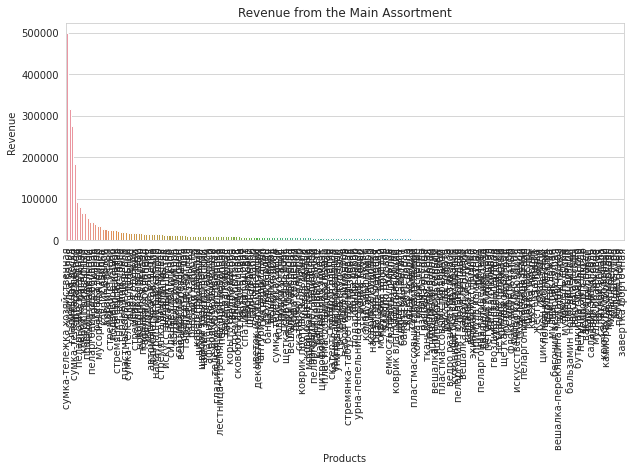

In [107]:
AX_BX = ABC_XYZ[ABC_XYZ['ABC_XYZ']=='AX_BX']
plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

sns.barplot(data= AX_BX, x='product', y='revenue')  # Building a graph based on the obtained table
plt.xticks(rotation=90)
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.title('Revenue from the Main Assortment')
plt.show()

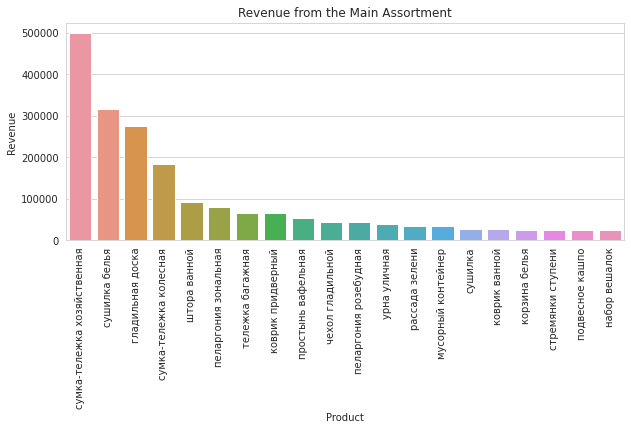

In [108]:
top_product = ABC_XYZ.head(20)

plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

sns.barplot(data= top_product, x='product', y='revenue')  
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue from the Main Assortment')
plt.show()

Additional assortment CZ group.

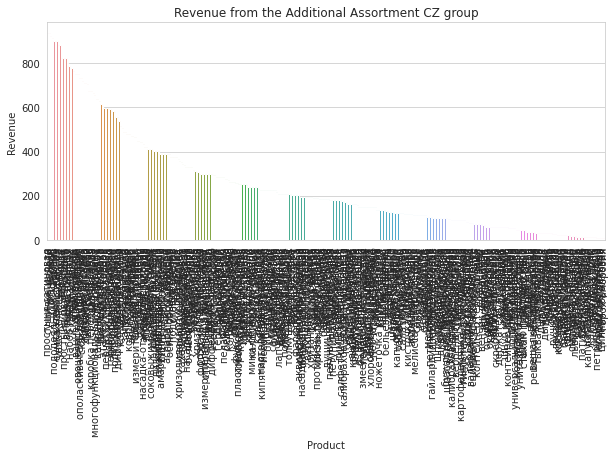

In [109]:
adition_items = ABC_XYZ[ABC_XYZ['ABC_XYZ'] =='CZ']


plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

sns.barplot(data= adition_items, x='product', y='revenue')  
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue from the Additional Assortment CZ group')
plt.show()

In [110]:
fig = go.Figure(data=[go.Pie(labels = ABC_XYZ['ABC_XYZ'],
                             values = ABC_XYZ['revenue'])])
fig.update_layout(title='Доли разных сегментов ABC_XYZ ',
                  width=800, 
                  height=500,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='ABC_XYZ сегрменты',
                                    showarrow=False)])
fig.show()

"As expected, more than 85% of the products fall into the AX_BX group of the MAIN assortment, while less than 15% belong to other groups."

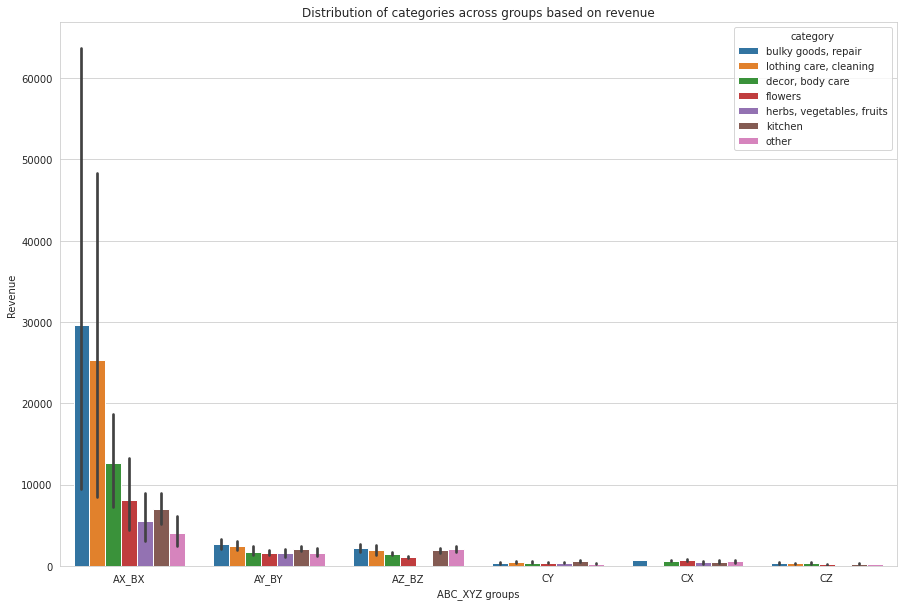

In [111]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')

sns.barplot(data = ABC_XYZ, x= 'ABC_XYZ', y= 'revenue' , hue='category')

plt.xlabel('ABC_XYZ groups')
plt.ylabel('Revenue')
plt.title('Distribution of categories across groups based on revenue')

plt.show()

"Each category is represented in the AX_BX segment. The highest revenue comes from the 'Bulky goods, repairs' segment, while 'Clothing care, Cleaning' are also very profitable categories. All other segments are too small to consider."

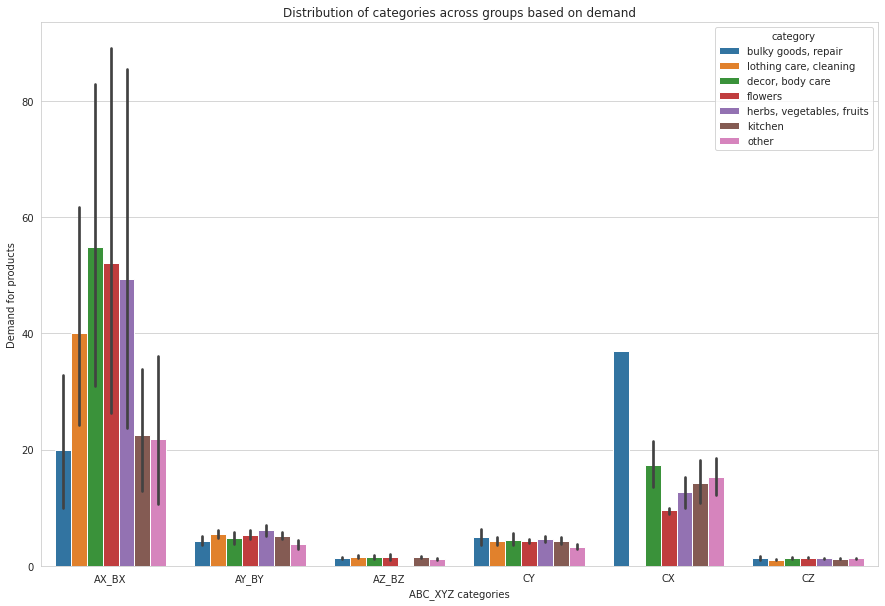

In [112]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')

sns.barplot(data = ABC_XYZ, x= 'ABC_XYZ', y= 'quantity' , hue='category')

plt.xlabel('ABC_XYZ categories')
plt.ylabel('Demand for products')
plt.title('Distribution of categories across groups based on demand')

plt.show()

In the AX_BX segment, the leader in terms of the number of sold items is 'Herbs, vegetables, fruits'.

## Step 5: Hypothesis Testing.

### First hypothesis.

In [113]:
# Hypothesis testing function
def test(sample_1, sample_2):

    from scipy import stats as st
    import numpy as np

    alpha = 0.05 # Significance level
    # If the p-value is less than this, we will reject the hypothesis

    results = st.ttest_ind(sample_1, sample_2)

    print('p-value:', results.pvalue)

    if results.pvalue < alpha:
        print('We reject the null hypothesis')
    else:
        print('We failed to reject the null hypothesis')

**Hypotheses:**

H0: The average check for the 'Flowers' category is the same as the average check for the 'Herbs, vegetables, fruits' category.

H1: The average check for the 'Flowers' category is different from the average check for the 'Herbs, vegetables, fruits' category."

In [116]:
data_flowers = data_flt[data_flt['category'] == 'flowers']
data_plants = data_flt[data_flt['category'] == 'herbs, vegetables, fruits']

In [117]:
test_flowers_plants = test(data_flowers['revenue'], data_plants['revenue'])

p-value: 0.000425123308058635
We reject the null hypothesis


The hypothesis was not confirmed; the probability that the average check for the 'Flowers' category is the same as the average check for the 'Herbs, vegetables, fruits' category is extremely low.

### Second hypothesis

Hypotheses for testing the equality of average sold items for multiple comparisons of identical months in different years. It can be assumed that they are the same if there were no unforeseen events affecting demand.

Pairs of Year : Month
   - 2018-10 : 2019-10
   - 2018-11 : 2019-11
   - 2018-12 : 2019-12
   - 2019-01 : 2020-01

**Hypotheses**

H0: The average number of sold items for Year 1 Month 1 is the same as the average number of sold items for Year 2 Month 1.

H1: The average number of sold items for Year 1 Month 1 is different from the average number of sold items for Year 2 Month 1.

In [118]:
#Function for hypothesis testing for multiple comparisons
def test_mult(sample_1, sample_2):

    from scipy import stats as st
    import numpy as np

    alpha = 0.05 #  Significance level
    # If the p-value is less than this, we will reject the hypothesis

    results = st.ttest_ind(sample_1, sample_2)

    print('p-value:', results.pvalue)
    # Adjusting alpha using the Šidák method
    if results.pvalue < alpha:
        print('We reject the null hypothesis')
    else:
        print('We failed to reject the null hypothesis')

In [119]:
data_1810 = data_flt[data_flt['month'] == '2018-10']
data_1910 = data_flt[data_flt['month'] == '2019-10']

data_1811 = data_flt[data_flt['month'] == '2018-11']
data_1911 = data_flt[data_flt['month'] == '2019-11']

data_1812 = data_flt[data_flt['month'] == '2018-12']
data_1912 = data_flt[data_flt['month'] == '2019-12']

data_1901 = data_flt[data_flt['month'] == '2019-01']
data_2001 = data_flt[data_flt['month'] == '2020-01']


In [120]:
test_1810_1910 = test_mult(data_1810['quantity'], data_1910['quantity'])

p-value: 0.5920971575042403
We failed to reject the null hypothesis


In [121]:
test_1811_1911 = test_mult(data_1811['quantity'], data_1911['quantity'])

p-value: 5.969470799197679e-05
We reject the null hypothesis


In [122]:
test_1812_1912 = test_mult(data_1812['quantity'], data_1912['quantity'])

p-value: 5.975208947271707e-05
We reject the null hypothesis


In [123]:
test_1901_2001 = test_mult(data_1901['quantity'], data_2001['quantity'])

p-value: 1.0777651173094804e-05
We reject the null hypothesis


The hypothesis that the demand in different years is close in value for different months was confirmed only for October. In other months, it significantly differs

## Step 5: Conclusions for the project.

As a result of the exploratory data analysis of the data provided by the online home goods store 'Still Here,' the following work was carried out, and conclusions were drawn.

The data were prepared and cleaned.

Product categorization was conducted.

The impact of the purchase time, day, and month on demand was analyzed.

ABC analysis was conducted for demand and revenue.

Hypotheses were tested.

Conclusions and Recommendations:

- The majority of customers purchase a single item.
- The price of a significant number of items is around 200 rubles.
- The highest revenue comes from the categories 'Bulky goods, repairs' (32%) and 'Clothing care and cleaning' (26%).
- The least numerous category is 'Herbs, vegetables, fruits' (7%).
- The products with the most positions are 'Flowers' (24%) and 'Herbs, vegetables, fruits' (25%).
- The least numerous category is 'Bulky goods, repairs' (5%).
- Analysis of the impact of purchase time, day of the week, or month did not reveal clear patterns. More data may be needed for a more accurate picture.

- As a result of ABC analysis, product segmentation into groups was conducted.

MAIN assortment of the store:

More than 85% of the products fall into the AX_BX group.
Products of groups AX and BX provide the main income and sell steadily.
Recommendation: Additional reserves should be created for these products in the warehouse to accommodate a potential increase in demand during specific periods. Reserves are necessary; these are important groups for the company that bring a significant portion of income.

ADDITIONAL assortment:
A detailed analysis of each category with recommendations is presented in the 'Categories of different groups of product assortment' section.

Hypothesis Testing:

- Hypotheses H0: The average check for the 'Flowers' category is the same as the average check for the 'Herbs, vegetables, fruits' category. H1: The average check for the 'Flowers' category is different from the average check for the 'Herbs, vegetables, fruits' category. The hypothesis was not confirmed; the probability that the average check for the 'Flowers' category is the same as the average check for the 'Herbs, vegetables, fruits' category is extremely low.

- Testing hypotheses for the equality of average sold items for identical months in different years revealed that the demand in different years differs significantly in months other than October.